<a href="https://colab.research.google.com/github/SabeehaMazahir/MachineLearning/blob/main/ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import necessary libraries

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import zipfile

#### Loading the dataset

In [ ]:
with zipfile.ZipFile('/content/adult.zip', 'r') as zip_ref:
    zip_ref.extractall('extractedFiles')

In [ ]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Load training data
train_data = pd.read_csv('/content/extractedFiles/adult.data', names=column_names, sep=',\s', engine='python')

# Load the test data
test_data = pd.read_csv('/content/extractedFiles/adult.test', names=column_names, skiprows=1, sep=',\s', engine='python')

In [ ]:
train_data.shape

(32561, 15)

In [ ]:
test_data.shape

(16281, 15)

In [ ]:
train_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [ ]:
# Display the number of missing values for each column
print(train_data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [ ]:
# Display the number of missing values for each column
print(test_data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [ ]:
# no of unique values in each column
train_data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [ ]:
test_data.nunique()

age                  73
workclass             9
fnlwgt            12787
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        113
capital-loss         82
hours-per-week       89
native-country       41
income                2
dtype: int64

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,16281.0,38.767459,13.849187,17.0,28.0,37.0,48.0,90.0
fnlwgt,16281.0,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
education-num,16281.0,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
capital-gain,16281.0,1081.905104,7583.935968,0.0,0.0,0.0,0.0,99999.0
capital-loss,16281.0,87.899269,403.105286,0.0,0.0,0.0,0.0,3770.0
hours-per-week,16281.0,40.392236,12.479332,1.0,40.0,40.0,45.0,99.0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Find and count duplicate rows
print(train_data.duplicated().sum())

# Display duplicate rows
print(train_data[train_data.duplicated()])

24
       age         workclass  fnlwgt     education  education-num  \
4881    25           Private  308144     Bachelors             13   
5104    90           Private   52386  Some-college             10   
9171    21           Private  250051  Some-college             10   
11631   20           Private  107658  Some-college             10   
13084   25           Private  195994       1st-4th              2   
15059   21           Private  243368     Preschool              1   
17040   46           Private  173243       HS-grad              9   
18555   30           Private  144593       HS-grad              9   
18698   19           Private   97261       HS-grad              9   
21318   19           Private  138153  Some-college             10   
21490   19           Private  146679  Some-college             10   
21875   49           Private   31267       7th-8th              4   
22300   25           Private  195994       1st-4th              2   
22367   44           Private  3

In [ ]:
train_data = train_data.drop_duplicates()

In [ ]:
# Find and count duplicate rows in the test dataset
print(test_data.duplicated().sum())

# Display duplicate rows
print(test_data[test_data.duplicated()])

5
       age     workclass  fnlwgt  education  education-num  \
864     24       Private  194630  Bachelors             13   
11189   37       Private   52870  Bachelors             13   
11212   29       Private   36440  Bachelors             13   
13848   30       Private  180317  Assoc-voc             11   
15960   18  Self-emp-inc  378036       12th              8   

           marital-status         occupation   relationship   race     sex  \
864         Never-married     Prof-specialty  Not-in-family  White    Male   
11189  Married-civ-spouse    Exec-managerial        Husband  White    Male   
11212       Never-married       Adm-clerical  Not-in-family  White  Female   
13848            Divorced  Machine-op-inspct  Not-in-family  White    Male   
15960       Never-married    Farming-fishing      Own-child  White    Male   

       capital-gain  capital-loss  hours-per-week native-country  income  
864               0             0              35  United-States  <=50K.  
11189 

In [ ]:
test_data = test_data.drop_duplicates()

In [ ]:
# Check the datatype of each column
print(train_data.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [ ]:
# Check the datatype of each column
print(test_data.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [ ]:
train_data['income'].value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

<Axes: xlabel='income', ylabel='count'>

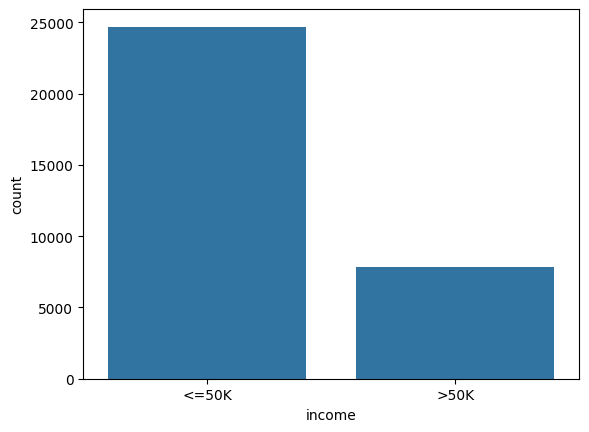

In [ ]:
sns.countplot(x = train_data['income'])

In [ ]:
labelEncoder = LabelEncoder()
train_data['income'] = labelEncoder.fit_transform(train_data['income'])
test_data['income'] = labelEncoder.fit_transform(test_data['income'])
train_data.head(3)
test_data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1


In [ ]:
categorical_features = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country'] #categorical features

# Apply One-Hot Encoding to both training and test datasets
train_data = pd.get_dummies(train_data, columns=categorical_features)
test_data = pd.get_dummies(test_data, columns=categorical_features)

In [ ]:
train_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
test_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,0,0,36,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16277,64,321403,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16278,38,374983,13,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16279,44,83891,13,5455,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# training data
x_train = train_data.drop(labels= 'income', axis = 1)
y_train = train_data[['income']]

In [ ]:
# testing data
x_test = test_data.drop(labels='income',axis = 1)
y_test = test_data['income']

In [ ]:
# Ensure the test set has the same feature columns as the training set
x_test_aligned, _ = x_test.align(x_train, join='right', axis=1, fill_value=0)

# Now, the test set only includes columns that appear in the training set,
# and any missing columns in the test set are filled with zeros.


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the classifier
gnb = GaussianNB()

# Fit the model
gnb.fit(x_train, y_train.values.ravel())

# Predict on the test set
y_pred = gnb.predict(x_test_aligned)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7957114770213811
Precision: 0.6427397260273973
Recall: 0.3049921996879875
F1 Score: 0.41368365367660026
